<a href="https://colab.research.google.com/github/nikitin712/project3_clustering_of_wholesales/blob/main/Clustering_of_wholesales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

https://archive.ics.uci.edu/dataset/352/online+retail

Рассмотрим открытый датасет, содержащий информацию о закупках оптовиков разных стран. Необходимо выделить оптовиков в отдельные группы, чтобы можно было применять к отдельным группам акции соответствующие их потребностям.

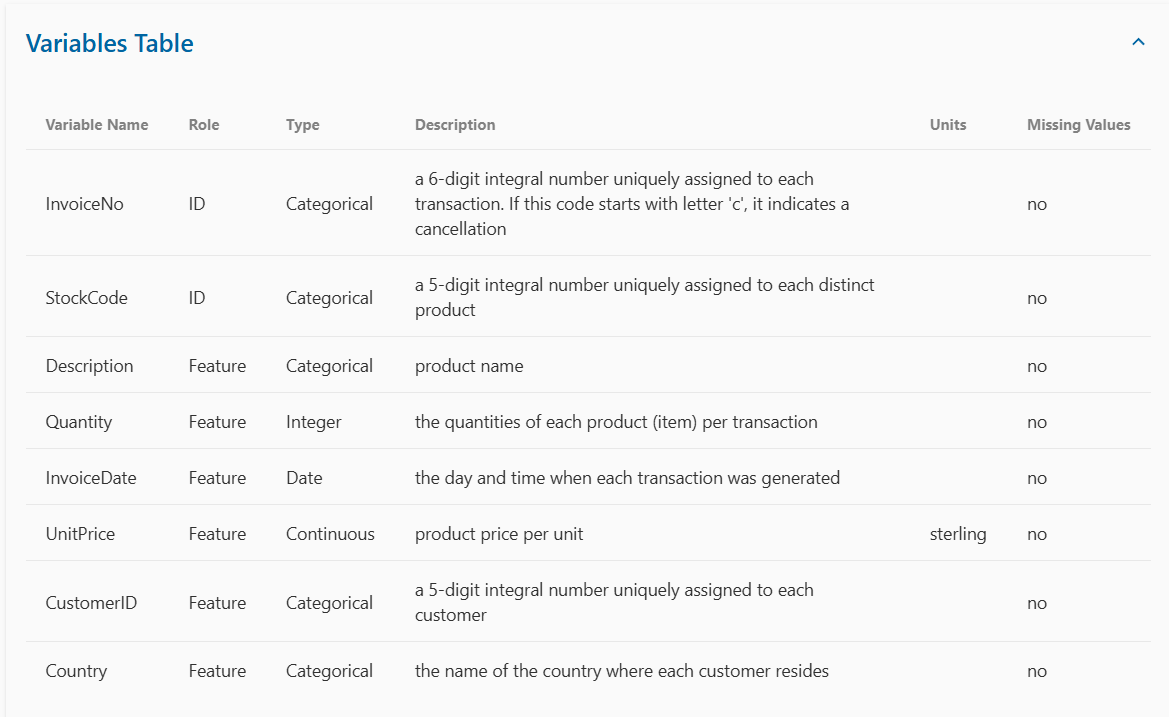

In [26]:
df = pd.read_excel('Online Retail.xlsx')

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [28]:
# уберем строки с пропусками
df = df.dropna()

In [29]:
df['total_price'] = df['UnitPrice'] * df['Quantity']

In [30]:
# так как код товара и описание относятся к одному товару, то одну из колонок можно удалить
df.drop(columns=['Description'], inplace=True)

In [31]:
print(f"Всего уникальных покупателей {len(df['CustomerID'].unique())}")

Всего уникальных покупателей 4372


In [32]:
df['Country'].value_counts()

,count
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


In [33]:
res = df.groupby('Country')['total_price'].agg(['sum', 'mean', 'count']).sort_values(['mean'])
print(res)

                              sum        mean   count
Country                                              
USA                      1730.920    5.948179     291
Unspecified              2667.070   10.930615     244
Saudi Arabia              131.170   13.117000      10
RSA                      1002.310   17.281207      58
United Kingdom        6767873.394   18.702086  361878
Portugal                29059.810   19.635007    1480
Malta                    2505.470   19.728110     127
Belgium                 40910.960   19.773301    2069
Cyprus                  12946.290   20.813971     622
Italy                   16890.510   21.034259     803
Poland                   7213.140   21.152903     341
European Community       1291.750   21.176230      61
Spain                   54774.580   21.624390    2533
France                 196712.840   23.167217    8491
Germany                221698.210   23.348943    9495
Czech Republic            707.720   23.590667      30
Iceland                  431

Как видим, на большую сумму закупаются оптовики из Австралии и Нидерландов, а меньше всего приносят прибыль оптовики из США и Саудовской Аравии.

In [34]:
df_minus = df[df['Quantity'] < 0]
df_minus

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
141,C536379,D,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...
540449,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [35]:
res_1 = df_minus.groupby('Country')['total_price'].agg(['sum', 'mean', 'count']).sort_values('mean')
print(res_1)

                          sum         mean  count
Country                                          
Singapore           -12158.90 -1736.985714      7
Portugal             -4380.08  -243.337778     18
Sweden               -1782.42  -162.038182     11
Spain                -6802.53  -141.719375     48
Israel                -227.44  -113.720000      2
Netherlands           -784.80   -98.100000      8
France              -12311.21   -82.625570    149
Cyprus                -644.09   -80.511250      8
United Kingdom     -540518.16   -71.753373   7533
Norway               -1001.98   -71.570000     14
EIRE                -15260.68   -61.784130    247
Japan                -2075.75   -56.101351     37
Greece                 -50.00   -50.000000      1
Channel Islands       -364.15   -36.415000     10
Czech Republic        -119.02   -23.804000      5
Finland               -219.34   -21.934000     10
Denmark               -187.20   -20.800000      9
Switzerland           -704.55   -20.130000     35


In [36]:
filtered = df.groupby('Country').filter(lambda x: x['total_price'].mean() > 25)
df_uk = df[df['Country'] == 'United Kingdom']
df_usa = df[df['Country'] == 'USA']
df_sa = df[df['Country'] == 'Saudi Arabia']

df_new = pd.concat([filtered, df_uk, df_usa, df_sa])
print(df_new)

       InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
197       536389     22941         6 2010-12-01 10:03:00       8.50   
198       536389     21622         8 2010-12-01 10:03:00       4.95   
199       536389     21791        12 2010-12-01 10:03:00       1.25   
200       536389    35004C         6 2010-12-01 10:03:00       5.45   
201       536389    35004G         4 2010-12-01 10:03:00       6.35   
...          ...       ...       ...                 ...        ...   
100815    544838     22555        12 2011-02-24 10:34:00       1.65   
100816    544838     22556        12 2011-02-24 10:34:00       1.65   
100817    544838     20781         2 2011-02-24 10:34:00       5.49   
100818    544838     22969        12 2011-02-24 10:34:00       1.45   
108127   C545507     22361        -5 2011-03-03 11:43:00       2.95   

        CustomerID       Country  total_price  
197        12431.0     Australia        51.00  
198        12431.0     Australia        39.60  
199

In [37]:
df_new['Country'].value_counts()

,count
Country,
United Kingdom,361878
EIRE,7485
Netherlands,2371
Switzerland,1877
Australia,1259
Norway,1086
Channel Islands,758
Finland,695
Sweden,462


In [54]:
result_1 = df_new.groupby('CustomerID')['total_price'].agg(['sum', 'mean', 'count', 'min', 'max']).sort_values(['mean'])
result_1

,sum,mean,count,min,max
CustomerID,,,,,
17448.0,-4287.63,-4287.630000,1,-4287.63,-4287.63
15369.0,-1592.49,-1592.490000,1,-1592.49,-1592.49
13154.0,-611.86,-611.860000,1,-611.86,-611.86
14213.0,-1192.20,-238.440000,5,-367.20,-122.40
17307.0,-152.64,-152.640000,1,-152.64,-152.64
...,...,...,...,...,...
15749.0,21535.90,1435.726667,15,-6539.40,6539.40
16532.0,6748.80,1687.200000,4,374.40,2232.00
17846.0,2033.10,2033.100000,1,2033.10,2033.10


In [55]:
# Выбираем нужные столбцы
X = result_1[['sum', 'mean', 'count']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

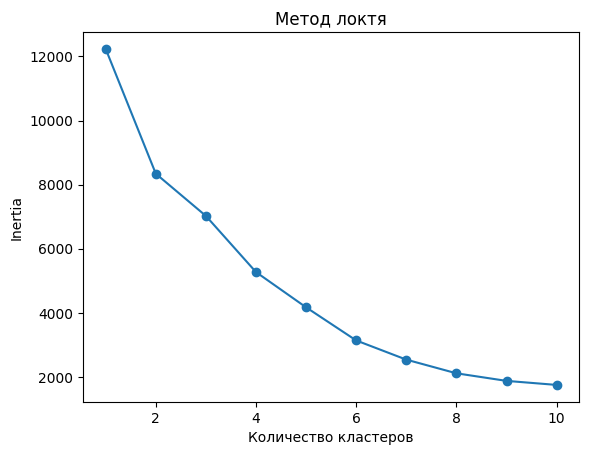

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Пробуем разное количество кластеров (от 1 до 10)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Визуализация
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()

Изгиб начинается с 4 кластеров, поэтому разобью данные на 4 кластеров.

In [74]:
kmeans = KMeans(n_clusters=4, random_state=42)
result_1['Cluster'] = kmeans.fit_predict(X_scaled)

# Посмотрим распределение по кластерам
print(result_1['Cluster'].value_counts())

Cluster
0    4061
2       6
3       6
1       5
Name: count, dtype: int64


In [75]:
print('2 cluster\n', result_1[result_1['Cluster'] == 2], end='\n' + '-' * 70 + '\n')
print('1 cluster\n', result_1[result_1['Cluster'] == 1], end='\n' + '-' * 70 + '\n')
print('3 cluster\n', result_1[result_1['Cluster'] == 3], end='\n' + '-' * 70 + '\n')

print('0 cluster\n', result_1[result_1['Cluster'] == 0], end='\n' + '-' * 70 + '\n')

2 cluster
                   sum       mean  count      min      max  Cluster
CustomerID                                                        
14606.0      11713.85   4.210586   2782   -55.10   139.30        2
17841.0      40340.78   5.053336   7983   -39.95   349.50        2
12748.0      29072.10   6.262839   4642 -1829.84   850.50        2
14096.0      57120.91  11.139023   5128 -1100.44  1599.26        2
14911.0     132572.62  22.458516   5903 -1687.17  1687.17        2
15311.0      59419.34  23.853609   2491  -275.00   408.00        2
----------------------------------------------------------------------
1 cluster
                   sum        mean  count      min      max  Cluster
CustomerID                                                         
14156.0     113384.14   79.847986   1420 -1224.00  2365.20        1
14646.0     279489.02  134.047492   2085  -266.40  4992.00        1
12415.0     123725.45  159.030141    778  -425.00  1718.40        1
17450.0     187482.17  534.1372

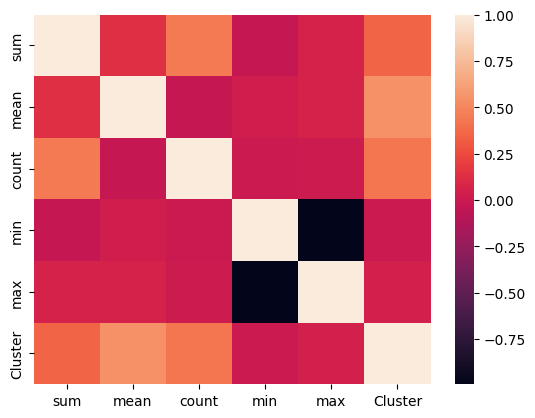

In [76]:
fig, ax = plt.subplots()
correl = result_1.corr(numeric_only=True)
sns.heatmap(correl)
plt.show()

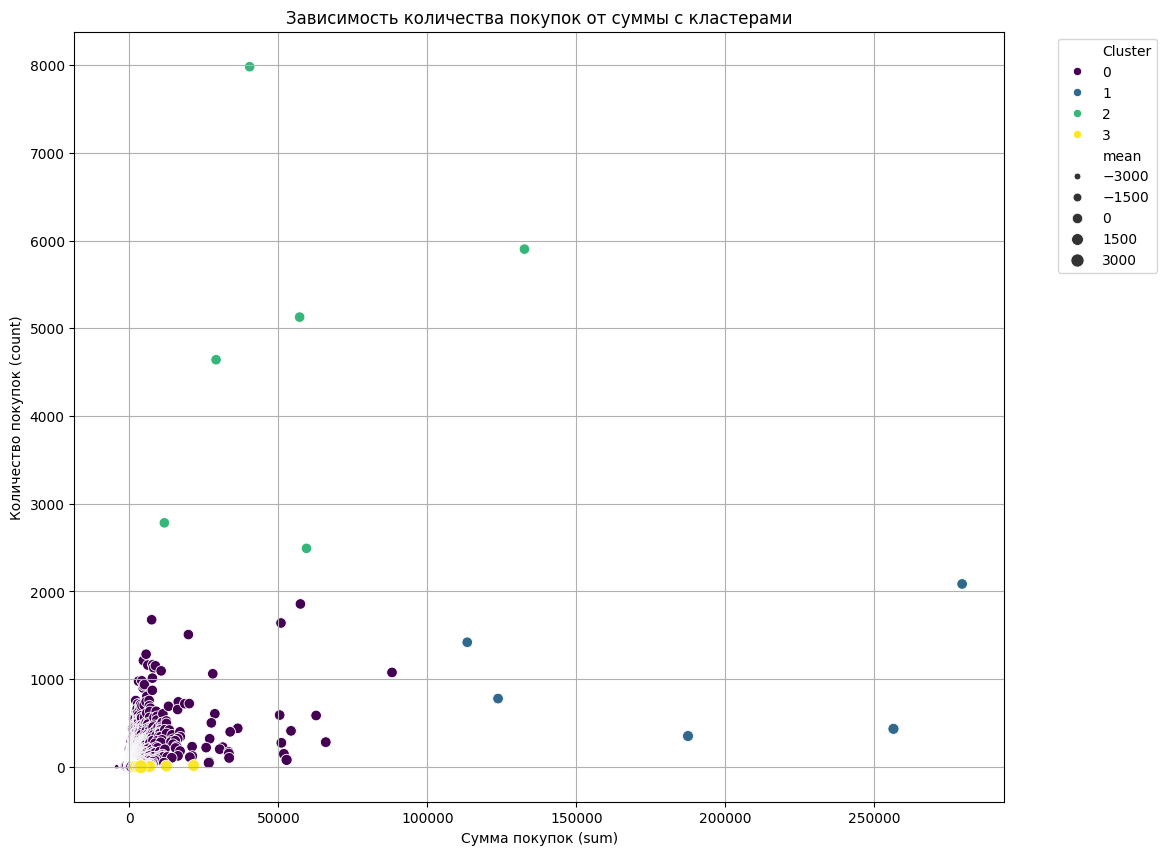

In [77]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=result_1,
    x='sum',
    y='count',
    hue='Cluster',  # Цвет по кластерам (если есть столбец 'Cluster')
    palette='viridis',  # Палитра цветов
    size='mean',  # Размер точек по среднему чеку (опционально)
    sizes=(10, 100),  # Диапазон размеров
    alpha=1
)
plt.title('Зависимость количества покупок от суммы с кластерами')
plt.xlabel('Сумма покупок (sum)')
plt.ylabel('Количество покупок (count)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Легенда справа
plt.grid(True)
plt.show()

Подведем итоги. Пользователей удалось разбить на 4 кластера. Из них наиболее выделяющиеся кластеры: 1 - люди, которые протратили больше всего на закупку товаров, 2 - люди, которые совершили больше всего покупок, 0 - обычные оптовики, которые не тратят много на товар и совершают не так много покупок. Кластер 3 вероятнее всего относится к 0 кластеру.